In [3]:
import numpy as np


In [5]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 6, 3, 6, 4])

fit = np.polyfit(x, y, deg=1)
polynomial_function = np.poly1d(fit)
print(polynomial_function)

 
0.2 x + 3.8


In [9]:
x_fit = np.linspace(0, 6)
y_fit = polynomial_function(x_fit)
print(len(x_fit), len(y_fit))
print(type(y_fit), y_fit.shape, x_fit.shape)

50 50
<class 'numpy.ndarray'> (50,) (50,)


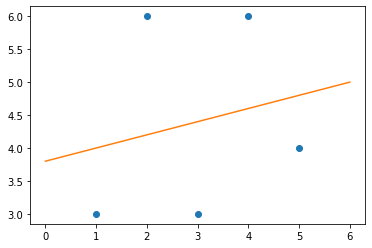

In [10]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.plot(x_fit, y_fit)
plt.show()

In [13]:
from scipy.optimize import curve_fit

def Poly_1d_function(input_x, coef_a, coef_b) : 
    return coef_a * input_x + coef_b


# popt : parameter optimized(?) 아닐수도 있음
# pcov : popy covariance(공분산)
popt, pcov = curve_fit(f=Poly_1d_function, xdata=x, ydata=y)
print(popt)
print(pcov)

[0.2 3.8]
[[ 0.29333337 -0.8800001 ]
 [-0.8800001   3.22666695]]


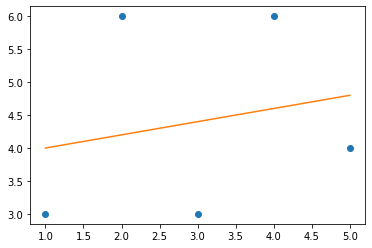

In [14]:
x_curvfit = np.linspace(min(x), max(x))
y_curvfit = Poly_1d_function(x_curvfit, coef_a=popt[0], coef_b=popt[1])

plt.plot(x, y, 'o')
plt.plot(x_curvfit, y_curvfit)
plt.show()

[-0.24600234  4.40866723]
[[ 0.98830472 -0.03482026]
 [-0.03482026  0.60229174]]


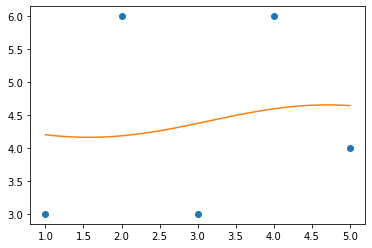

In [18]:
def sin_fun(input_x, coef_a, cof_b) : 
    return np.sin(input_x) * coef_a + cof_b

curv_param, pcov = curve_fit(f=sin_fun, xdata=x, ydata=y)
print(curv_param)
print(pcov)

x_sin_fit = np.linspace(min(x), max(x))
y_sin_fit = sin_fun(x_sin_fit, coef_a=curv_param[0], cof_b=curv_param[1])

plt.plot(x, y, 'o')
plt.plot(x_sin_fit, y_sin_fit)
plt.show()

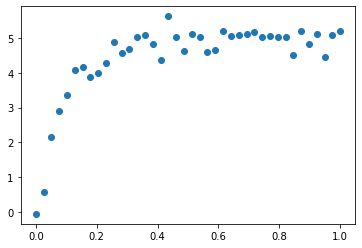

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([
    0.    , 0.0256, 0.0513, 0.0769, 0.1026, 0.1282, 0.1538, 0.1795,
    0.2051, 0.2308, 0.2564, 0.2821, 0.3077, 0.3333, 0.359 , 0.3846,
    0.4103, 0.4359, 0.4615, 0.4872, 0.5128, 0.5385, 0.5641, 0.5897,
    0.6154, 0.641 , 0.6667, 0.6923, 0.7179, 0.7436, 0.7692, 0.7949,
    0.8205, 0.8462, 0.8718, 0.8974, 0.9231, 0.9487, 0.9744, 1.    
    ])

y_data = np.array([
    -0.0582,  0.5609,  2.1524,  2.8921,  3.3555,  4.092 ,  4.1593,
    3.8705,  3.9884,  4.2759,  4.8735,  4.5771,  4.6779,  5.0256,
    5.0751,  4.8384,  4.366 ,  5.6249,  5.0227,  4.633 ,  5.1175,
    5.0317,  4.6023,  4.6559,  5.2119,  5.0483,  5.075 ,  5.1081,
    5.1749,  5.0215,  5.0547,  5.0363,  5.0381,  4.4984,  5.2146,
    4.8216,  5.128 ,  4.4662,  5.0975,  5.1963
])

plt.plot(x_data, y_data, 'o')
plt.show()

In [41]:
def ln_fun(x_data, coef_a, coef_b, bias_1) : 
    return coef_a * np.log(abs(x_data + bias_1)) + coef_b

from scipy.optimize import curve_fit

def veloc(t,v0,tau):
    return v0*(1 - np.exp(-t/tau))

ln_param, ln_cov = curve_fit(f=ln_fun, xdata=x_data, ydata=y_data)
veloc_param, veloc_conv = curve_fit(f=veloc, xdata=x_data, ydata=y_data)
print(ln_param)
# print(ln_cov)
print(veloc_param)

[ 9.55517388e-01  5.45470525e+00 -3.74655880e-03]
[4.98137121 0.09643936]


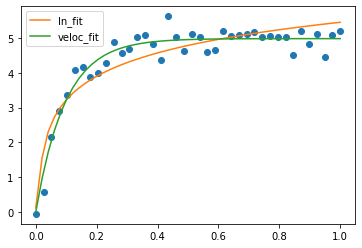

In [44]:
x_ln_fit = np.linspace(min(x_data), max(x_data))
y_ln_fit = ln_fun(x_ln_fit, coef_a=ln_param[0], coef_b=ln_param[1], bias_1=ln_param[2])
y_vel_fit = veloc(x_ln_fit, veloc_param[0], veloc_param[1])

plt.plot(x_data, y_data, 'o')
plt.plot(x_ln_fit, y_ln_fit, label="ln_fit")
plt.plot(x_ln_fit, y_vel_fit, label="veloc_fit")
plt.legend()
plt.show()

In [55]:
from scipy.optimize import newton

coeff = [3.2, 2, 1]
print(np.roots(coeff)[0] + 1)
print(np.roots(coeff)[0])

(-0.3125+1.463512405443479j)
(-0.3125+0.46351240544347894j)
